In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import os

In [2]:
path = r"C:\Users\stefa\CitiBike"

In [3]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'CitiBikeWeatherWrangled.csv'),  index_col = False)

In [4]:
df.dtypes

date                    object
ride_id                 object
rideable_type           object
started_at              object
ended_at                object
start_station_name      object
start_station_id        object
end_station_name        object
end_station_id          object
start_lat              float64
start_lng              float64
end_lat                float64
end_lng                float64
member_casual           object
average_tempurature    float64
bike_rides_daily         int64
_merge                  object
dtype: object

Step 3: Pick one theme and set it for all plots, and think of the style and the palette you want to use. 

In [5]:
# Set the theme and style
sns.set_theme(style="dark")

In [6]:
# Set the color palette
sns.set_palette("rocket_r")

Step 4: Create a bar chart of the top 20 starting stations frequencies. Does the color palette you chose when you set the theme in the previous step make sense in this plot? If not, change the style of this specific plot temporarily. Hint: Does the default setting of the palette contain enough colors?

In [7]:
df['value'] = 1

In [8]:
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [9]:
df_t

,start_station_name,value
0,11 St & Washington St,15502
1,12 St & Sinatra Dr N,17137
2,14 St Ferry - 14 St & Shipyard Ln,17066
3,4 St & Grand St,10356
4,5 Corners Library,3043
...,...,...
79,Van Vorst Park,10744
80,Warren St,13575
81,Washington St,15101
82,Willow Ave & 12 St,9459


In [10]:
top20 = df_t.nlargest(20, 'value')

In [11]:
top20

,start_station_name,value
37,Grove St PATH,42556
75,South Waterfront Walkway - Sinatra Dr & 1 St,34245
44,Hoboken Terminal - River St & Hudson Pl,33020
43,Hoboken Terminal - Hudson St & Hudson Pl,30244
22,City Hall - Washington St & 1 St,23289
69,Newport Pkwy,21961
38,Hamilton Park,20477
68,Newport PATH,19965
42,Hoboken Ave at Monmouth St,19501
61,Marin Light Rail,19230


In [12]:
top20.rename(columns={'start_station_name': 'Starting Station', 'value': 'Frequency'}, inplace=True) 

In [13]:
top20

,Starting Station,Frequency
37,Grove St PATH,42556
75,South Waterfront Walkway - Sinatra Dr & 1 St,34245
44,Hoboken Terminal - River St & Hudson Pl,33020
43,Hoboken Terminal - Hudson St & Hudson Pl,30244
22,City Hall - Washington St & 1 St,23289
69,Newport Pkwy,21961
38,Hamilton Park,20477
68,Newport PATH,19965
42,Hoboken Ave at Monmouth St,19501
61,Marin Light Rail,19230


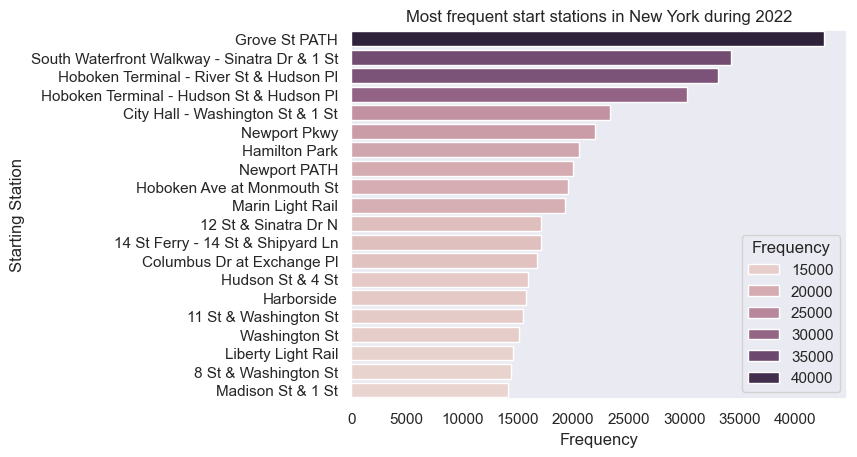

In [14]:
sns.barplot(data = top20, x = 'Frequency', y = 'Starting Station', hue='Frequency', dodge=False)
plt.title("Most frequent start stations in New York during 2022")
plt.show()

Answer to Step 4: The color palette makes sense for this plot.

Step 5: Recreate the dual-axis line plot from the previous Exercise using seaborn.

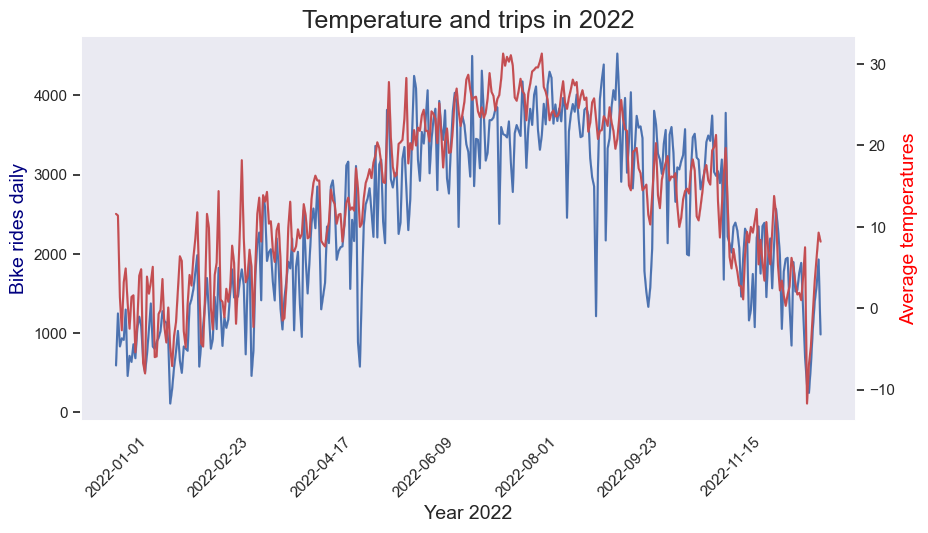

In [15]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df, x='date', y='bike_rides_daily', color="b", ax=ax)
plt.xticks(rotation=45) 
ax.xaxis.set_major_locator(ticker.MultipleLocator(53))
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily", color = "navy", fontsize = 14) # set y-axis label
ax2 = ax.twinx()
sns.lineplot(data=df, x='date', y='average_tempurature', color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

Step 6: Make a box plot of one of the categorical variables in your data set. What does this plot tell you about the variable? Write down a 3 to 5-sentence analysis of the elements of the box plot. 

In [16]:
df.columns

Index(['date', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'average_tempurature', 'bike_rides_daily', '_merge',
       'value'],
      dtype='object')

In [17]:
df['member_casual']

0         casual
1         casual
2         member
3         member
4         casual
           ...  
895480    casual
895481    casual
895482    member
895483    member
895484    member
Name: member_casual, Length: 895485, dtype: object

C:\Users\stefa\AppData\Local\Temp\ipykernel_19088\3727999863.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'member_casual', y = 'bike_rides_daily', data = df, palette = "rocket")


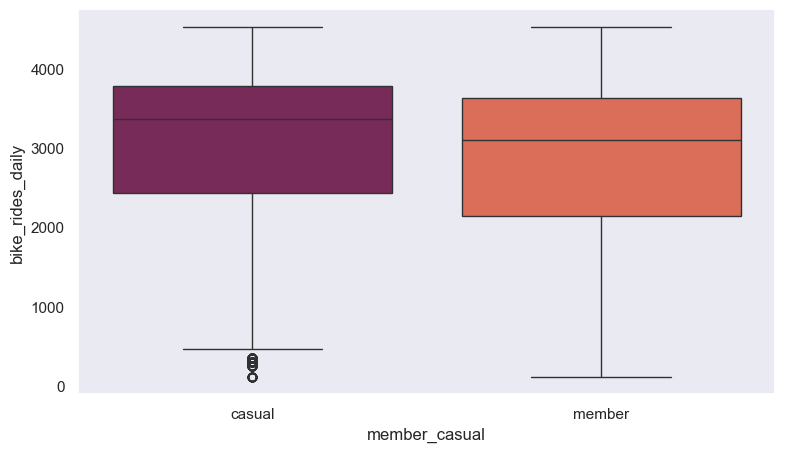

In [18]:
plt.figure(figsize=(9,5))
sns.boxplot(x = 'member_casual', y = 'bike_rides_daily', data = df, palette = "rocket")
plt.show()

Answer to Step 6: Casual and members have similar nummbers of daily useage. CitiBike should be targeting casual users with new member rewards and other incentives to get them to become members. Perhaps raising non-member prices to gently encourage the jump to being members. 

Step 7: Think of how the FacetGrid plot would make sense to aid the analysis questions in the project. Create a FacetGrid and write 2 to 3 sentences analyzing what insight its output brings. 

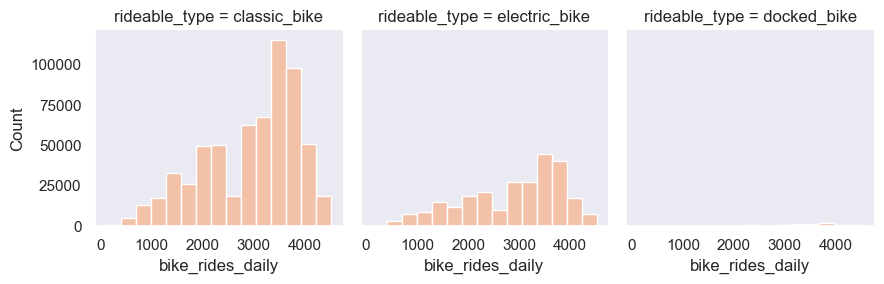

In [19]:
grid = sns.FacetGrid(df, col = "rideable_type")
grid.map(sns.histplot, "bike_rides_daily", bins = 15)

In [20]:
df['rideable_type'] = df['rideable_type'].replace(['docked_bike'], np.nan)

In [21]:
df_cleaned = df.dropna(subset=['rideable_type'])

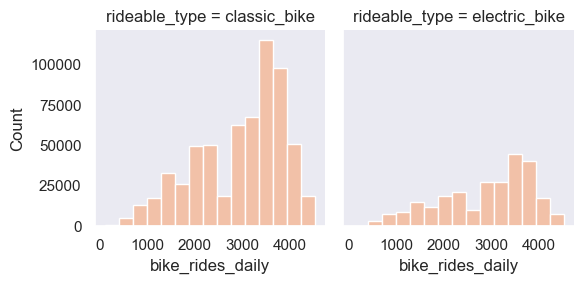

In [22]:
grid = sns.FacetGrid(df_cleaned, col = "rideable_type", palette = "rocket")
grid.map(sns.histplot, "bike_rides_daily", bins = 15)

Answer to step 7: The facetgrid allows the user to more easily compare data from a single catagory without visual clutter. The facetgrid breaks data from a single catagory into multiple bargraphs based on their individual values. It is designed with comparing catagorical data (ie. X vs Y) as compared to numerucal data (ie. 1 vs 2).